<a href="https://colab.research.google.com/github/carolflyjs/cs230/blob/master/Glove_LSTM_Model_128d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%run "/content/drive/My Drive/Colab Notebooks/Data_Processing_v2.ipynb"
%run "/content/drive/My Drive/Colab Notebooks/utils.ipynb"

     |████████████████████████████████| 1.9MB 3.4MB/s 


Using TensorFlow backend.


load_file(path, delimiter=","): return df
data_prep(df, x_columns, y_columns): return X_train, Y_train
removeSpellingErrors(df): return new_df
tokenize_and_pad(X_train), return X_train_padded, max_value, vocab_size, tokenizer
store_weights(mode, model_name, path="/content/drive/My Drive/cs230/")
load_weights(mode, model_name, path="/content/drive/My Drive/cs230/")
join_histories_and_plot(*histories)

load_embedding_matrix(embeddings_index, vocab_size, embedding_dim, word_index)
embedding_index = pre-trained embedding dictionary with key being the word and value being the embedding scores
vocab_size = total number of unique tokens in the training data
embedding_dim = dimension used in the embedding_index for each token
word_index = token dictionary with key being the word and value being the token



In [0]:
glove_file = keras.utils.get_file("glove.6B.zip", "http://nlp.stanford.edu/data/glove.6B.zip", extract=True)

862183424/862182613 [==============================] - 388s 0us/step


In [0]:
def load_glove(glove_dir, glove_file_name):
    embeddings_index = {}
    f = open(os.path.join(glove_dir, glove_file_name))
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
        except:
            pass
    f.close()
    return embeddings_index

In [0]:
embeddings_index = load_glove("/root/.keras/datasets/", "glove.6B.100d.txt")
embedding_dim = 100

In [0]:
def load_embedding_matrix(embeddings_index, vocab_size, embedding_dim, word_index):
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    not_found = []
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector
        else:
            not_found.append((word, i))
    return embedding_matrix, not_found

In [0]:
def build_glove_model(max_value, vocab_size, optimizer, embedding_matrix, embedding_dim = 100, LSTM_dim = 128): 
    X_input = Input(shape=(max_value * 2,), dtype="int32")
    X = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix])(X_input)
    X = LSTM(LSTM_dim, kernel_regularizer=keras.regularizers.l2(0.01))(X)
    # X = keras.layers.Flatten("channels_last")(X)
    X = Dense(5, activation="softmax")(X)

    model = Model(inputs=[X_input], outputs=X)

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
    model.summary()

    return model

embedding_matrix, _ = load_embedding_matrix(embeddings_index, vocab_size, embedding_dim, tokenizer.word_index)
optimizer = keras.optimizers.Adagrad(lr=0.035)
model = build_glove_model(max_value=max_value, vocab_size=vocab_size, optimizer=optimizer, embedding_matrix=embedding_matrix, embedding_dim=embedding_dim, LSTM_dim=128)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 16)                0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 16, 100)           351700    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 469,593
Trainable params: 469,593
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train_tokenized, Y_train, validation_data=(X_dev_tokenized, Y_dev), epochs=50, batch_size=32, class_weight=class_weight) 

Train on 290693 samples, validate on 18723 samples
Epoch 1/50
290693/290693 [==============================] - 349s 1ms/step - loss: 0.9614 - categorical_accuracy: 0.8452 - val_loss: 0.4425 - val_categorical_accuracy: 0.8801
Epoch 2/50
290693/290693 [==============================] - 348s 1ms/step - loss: 0.6358 - categorical_accuracy: 0.9061 - val_loss: 0.3469 - val_categorical_accuracy: 0.9144
Epoch 3/50
290693/290693 [==============================] - 349s 1ms/step - loss: 0.5105 - categorical_accuracy: 0.9300 - val_loss: 0.2863 - val_categorical_accuracy: 0.9360
Epoch 4/50
290693/290693 [==============================] - 348s 1ms/step - loss: 0.4374 - categorical_accuracy: 0.9425 - val_loss: 0.2613 - val_categorical_accuracy: 0.9478
Epoch 5/50
290693/290693 [==============================] - 350s 1ms/step - loss: 0.3904 - categorical_accuracy: 0.9512 - val_loss: 0.2680 - val_categorical_accuracy: 0.9430
Epoch 6/50
290693/290693 [==============================] - 349s 1ms/step - los

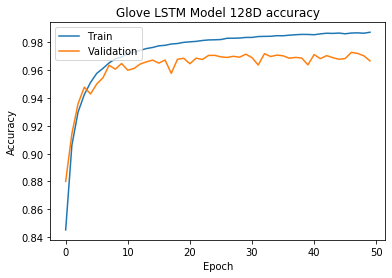

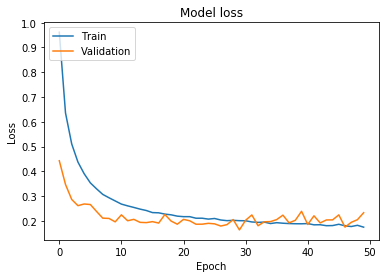

In [0]:
combined = join_histories_and_plot("Glove LSTM Model 128D", history)

In [0]:
getConfusionMatrix(model, X_test_tokenized, Y_test)

[[ 939    0    4    4    6]
 [   1 1069    0    3    9]
 [   0    1  190   11    4]
 [   1    2    7  192    3]
 [  17   12    3   12  616]]


In [0]:
model.evaluate(x=X_test_tokenized, y=Y_test)

3106/3106 [==============================] - 1s 177us/step


[0.22335845979946473, 0.9678042498390212]

In [0]:
errorAnalysis(model, X_test_tokenized, Y_test)

infusions nurse,caddie,URT,PT 0.9999901


registered behavioral technician,physician,URT,BT 0.99999166


promotions officer,portfolio administrator,URT,PT 0.5683061


consultant lead senior team,microsoft,URT,PT 0.96356535


doc,health care assistant,BT,PT 0.94526803


recruitment specialist,hiring specialist,NPT,URT 0.5341539


account specialist technology,mergers and acquisitions specialist,URT,NT 0.9935929


director change management,head business management,BT,URT 0.73859215


head of manufacturing,group lead production,NT,URT 0.9248392


information technology strategy manager,information technology strategy manager,NPT,PT 0.7344343


group ceo,group chief executive officer,PT,URT 0.84303045


business development finance manager,head of legal department,URT,BT 0.60207075


marketing member team,freelance marketing,NT,URT 0.8774039


business development director executive,director of business development,BT,PT 0.8051104


senior sql database administrator,senior sql database ad